In [43]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import Estimate

from LimitedCommitmentModel import LimitedCommitmentModelClass

# plot style
linestyles = ['-','--','-.',':',':']
markers = ['o','s','D','*','P']
linewidth = 2
font_size = 17
font = {'size':font_size}
matplotlib.rc('font', **font)

plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})
path = 'output/'

SAVE = False

# c++ settings
do_compile = True
threads = 7

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


# Solve the model

In [44]:
# compile c++ files
T = 5
specs = {  
    'model 1':{'latexname':'limited', 'par':{'kappa1': 0.5, 'kappa2': 0.0, 'T':T,'threads':threads,'bargaining':0}},
    #'model 2':{'latexname':'limited', 'par':{'kappa1': 0.5, 'kappa2': 0.0, 'T':T,'threads':threads,'bargaining':1}},
    #'model 3':{'latexname':'limited', 'par':{'kappa1': 0.5, 'kappa2': 0.0, 'T':T,'threads':threads,'bargaining':2}},
}




# solve different models
models = {}
for m,(name,spec) in enumerate(specs.items()):
    print(f'{name} loading...',end='')
    
    # setup model
    models[name] = LimitedCommitmentModelClass(name=name,par=spec['par'])
    models[name].spec = spec

    compile_now = True if do_compile & (m==0) else False
    models[name].link_to_cpp(force_compile=compile_now)
    
    print(' solving...')
    %time models[name].solve() 

model 1 loading... solving...
CPU times: total: 4.03 s
Wall time: 1.45 s


In [ ]:

model = models['model 1']
model.sim.init_A[:] =5.0 
model.sim.init_love[:] =0.7 
print(model.par.wage_K_m)
model.simulate()
print('model1')
print(f'Couple {np.mean(model.sim.couple,0)}')
print(f'Laborw {np.mean(model.sim.labor_w,0)}')
print(f'Laborm {np.mean(model.sim.labor_m,0)}')
print(f'Consumption W {np.mean(model.sim.cons_w,0)}')
print(f'Consumption M {np.mean(model.sim.cons_m,0)}')
print(f'Assetw {np.nanmean(model.sim.Aw,0)}')
print(f'Assetm {np.nanmean(model.sim.Am,0)}')
#print(f'Asset {np.nanmean(model.sim.A,0)}')
print(f'HKw {np.mean(model.sim.Kw,0)}')
print(f'HKm {np.mean(model.sim.Km,0)}')

model = models['model 2']
model.simulate()
print('model2')
print(f'Couple {np.mean(model.sim.couple,0)}')

print(f'Laborw {np.mean(model.sim.labor_w,0)}')
print(f'Laborm {np.mean(model.sim.labor_m,0)}')
print(f'Consumption W {np.mean(model.sim.cons_w,0)}')
print(f'Consumption M {np.mean(model.sim.cons_m,0)}')
print(f'Asset {np.nanmean(model.sim.A,0)}')
print(f'HKw {np.mean(model.sim.Kw,0)}')
print(f'HKm {np.mean(model.sim.Km,0)}')


#model = models['model 4, limited']
#model.simulate()
#print('model3')
#print(f'Couple {np.mean(model.sim.couple,0)}')
#print(f'Laborw {np.mean(model.sim.labor_w,0)}')
#print(f'Laborm {np.mean(model.sim.labor_m,0)}')
#print(f'Consumption W {np.mean(model.sim.cons_w,0)}')
#print(f'Consumption M {np.mean(model.sim.cons_m,0)}')
#print(f'Asset {np.nanmean(model.sim.A,0)}')
#print(f'HKw {np.mean(model.sim.Kw,0)}')
#print(f'HKm {np.mean(model.sim.Km,0)}')

model = models['model 1']
#print(model.sim.cons_m)
#print(model.sol.cons_m_single[4])
print(np.nanmin(model.sim.cons_m))
print(np.nanmin(model.sim.Am))
print(np.nanmin(model.sim.Km))



print(np.nanmin(model.sim.labor_m))
print(np.nanmin(model.sim.labor_w))


print(np.nanmin(model.sol.labor_m_single))


print(np.nanmax(model.sim.Am))
print(np.nanmax(model.sim.Km))

#print(model.sol.labor_m_single)





0.14
model1
Couple [0. 0. 0. 0. 0.]
Laborw [0.9343309  1.         0.90056851 0.82760259 0.76599893]
Laborm [0.80034044 0.99889226 0.87769307 0.99383151 0.99907248]
Consumption W [4.82247055 4.97251044 5.49897555 5.9411353  7.26009301]
Consumption M [3.85313138 6.1697927  6.57415671 7.64294897 8.59350283]
Assetw [2.92007626e-01 1.31066914e+00 1.72467448e+00 1.59630216e+00
 2.06048805e-07]
Assetm [5.27890085e-01 4.90169146e-01 4.34619820e-02 4.73371439e-02
 1.40000000e-10]
HKw [0.         0.93457019 1.84143016 2.55888691 3.13023142]
HKm [0.         0.79995047 1.72027946 2.42585544 3.17622321]


KeyError: 'model 2'

10
10
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.40867203 0.38727676 0.36622306
 0.3454321  0.32483926 0.30439091 0.28404113 0.26374971 0.24348103
 0.2232015  0.20288163 0.18249242 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         

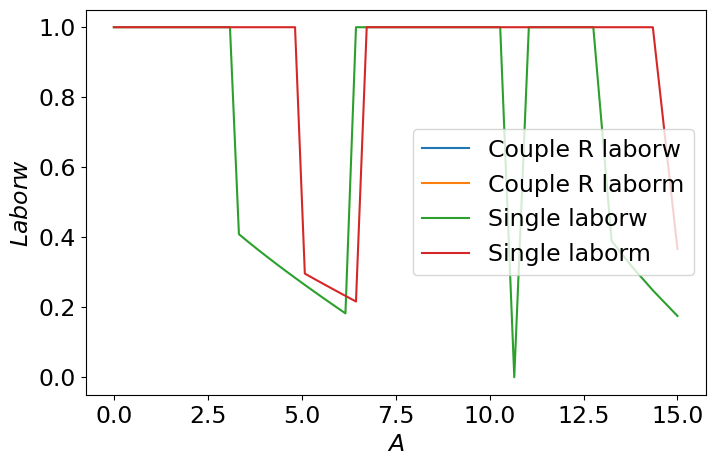

AttributeError: 'types.SimpleNamespace' object has no attribute 'cons_remain_couple'

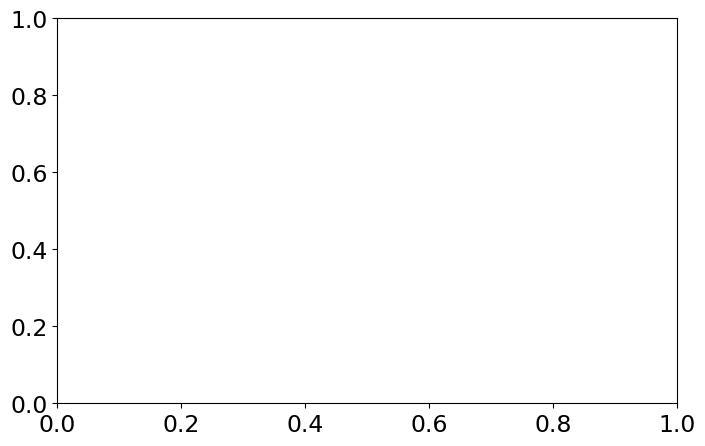

In [50]:
i_P = 20
i_P = 8
i_A = 2
i_L = 6
i_t = 3
i_HKw = 3
i_HKm = 3
t = i_t


#sol = models['model 2'].sol
#par = models['model 2'].par


#print(sol.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm])

#print(sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm])

#print(sol.labor_w_single[t,:,i_HKm])


sol = models['model 1'].sol
par = models['model 1'].par
print(par.num_K_pd)
print(par.num_K)

print(sol.Vw_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm])


print(sol.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm])

print(sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm])

print(sol.labor_w_single[t,:,i_HKm])



fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.labor_m_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.labor_w_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_A,sol.labor_m_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Laborw$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.cons_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.cons_m_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.cons_w_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_A,sol.cons_m_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Consumption$")
plt.legend()
plt.show()




fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_K,sol.labor_w_remain_couple[t,i_P,i_L,i_A,:,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_K,sol.labor_m_remain_couple[t,i_P,i_L,i_A,:,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_K,sol.labor_w_single[t,i_A,:], label = 'Single laborw')
ax.plot(par.grid_K,sol.labor_m_single[t,i_A,:], label = 'Single laborm')                      
ax.set_xlabel(f"$Kw$")
ax.set_ylabel(f"$Laborw$")
plt.legend()
plt.show()



fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.labor_w_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.labor_m_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborw')
ax.plot(par.grid_A,sol.labor_m_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborm')
ax.plot(par.grid_A,sol.labor_w_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_A,sol.labor_m_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Labor$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.Vw_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.Vm_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.Vw_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_A,sol.Vm_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Value$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_A,sol.Vw_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborw')
ax.plot(par.grid_A,sol.Vm_remain_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple R laborm')
ax.plot(par.grid_A,sol.Vw_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborw')
ax.plot(par.grid_A,sol.Vm_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Couple laborm')
ax.plot(par.grid_A,sol.Vw_single[t,:,i_HKw], label = 'Single laborw')
ax.plot(par.grid_A,sol.Vm_single[t,:,i_HKm], label = 'Single laborm')                      
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Value$")
plt.legend()
plt.show()



[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


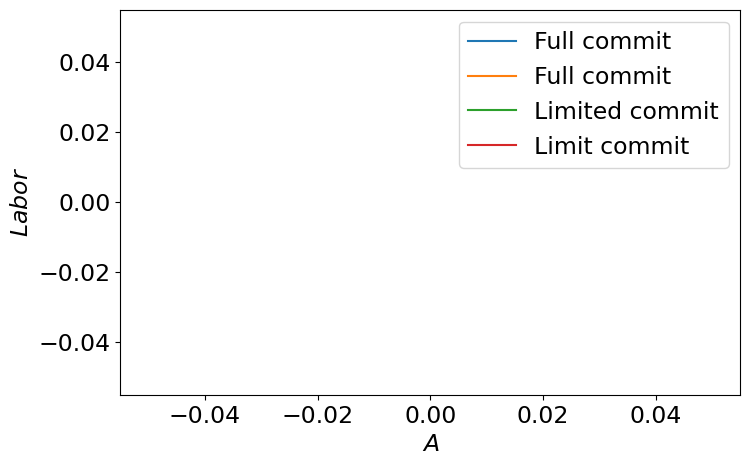

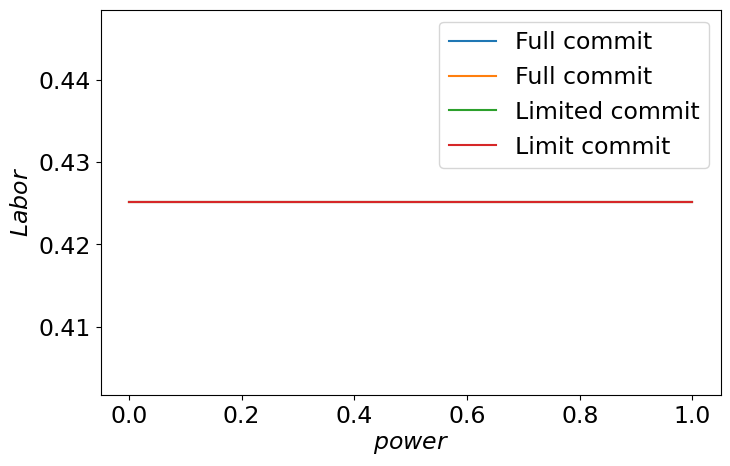

In [207]:

sol2 = models['model 2'].sol
sol1 = models['model 1'].sol
par = models['model 2'].par

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

print(sol1.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm])
ax.plot(par.grid_A,sol1.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Full commit')
ax.plot(par.grid_A,sol1.labor_m_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Full commit')
ax.plot(par.grid_A,sol2.labor_w_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Limited commit')
ax.plot(par.grid_A,sol2.labor_m_couple[t,i_P,i_L,:,i_HKw,i_HKm], label = 'Limit commit')                 
ax.set_xlabel(f"$A$")
ax.set_ylabel(f"$Labor$")
plt.legend()
plt.show()


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.plot(par.grid_power,sol1.power[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Full commit')
ax.plot(par.grid_power,sol1.power[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Full commit')
ax.plot(par.grid_power,sol2.power[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Limited commit')
ax.plot(par.grid_power,sol2.power[t,:,i_L,i_A,i_HKw,i_HKm], label = 'Limit commit')                 
ax.set_xlabel(f"$power$")
ax.set_ylabel(f"$Labor$")
plt.legend()
plt.show()

# Estimate the model

In [209]:
#Estimate the model one time
#model = models['model 3']

model.sim.init_A[:] = 6.0 # temp just to check that it works, if they have too little initial saving they will just consume everything, and saving is therefore close to zero, and the model cannot be estimated

np.random.seed(model.par.seed)
data = Estimate.create_data(model,start_p = 1, end_p = 4, to_xl = True)
data_reg = Estimate.aux_est(data,print_reg=True)
data_reg, Wald_FC, Wald_NC = Estimate.main_est(data_reg,print_reg=True) 

Residuals from hours equation
                                 OLS Regression Results                                
Dep. Variable:        delta_log_Labor   R-squared (uncentered):                   0.452
Model:                            OLS   Adj. R-squared (uncentered):              0.452
Method:                 Least Squares   F-statistic:                          2.697e+04
Date:                Mon, 22 Jan 2024   Prob (F-statistic):                        0.00
Time:                        14:54:42   Log-Likelihood:                      2.0564e+05
No. Observations:               98028   AIC:                                 -4.113e+05
Df Residuals:                   98025   BIC:                                 -4.112e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----

c:\Users\czk481\Anaconda3\lib\site-packages\statsmodels\base\model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


                                 OLS Regression Results                                
Dep. Variable:                   uhat   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.289e+06
Date:                Mon, 22 Jan 2024   Prob (F-statistic):                        0.00
Time:                        14:54:45   Log-Likelihood:                      3.0638e+05
No. Observations:               65352   AIC:                                 -6.127e+05
Df Residuals:                   65341   BIC:                                 -6.126e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------